- [Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [How to make 538 plots](https://www.dataquest.io/blog/making-538-plots/)
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
data_file = 'data/percent-bachelors-degrees-women-usa.csv'
women_majors = pd.read_csv(data_file, sep=',', encoding='utf-8')

In [4]:
women_majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

In [5]:
women_majors.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [6]:
low70_majors = women_majors.loc[0, women_majors.loc[0] < 20]
low70_majors.index

Index(['Agriculture', 'Architecture', 'Business', 'Computer Science',
       'Engineering', 'Physical Sciences'],
      dtype='object')

In [7]:
women_majors.loc[0] < 20

Year                             False
Agriculture                       True
Architecture                      True
Art and Performance              False
Biology                          False
Business                          True
Communications and Journalism    False
Computer Science                  True
Education                        False
Engineering                       True
English                          False
Foreign Languages                False
Health Professions               False
Math and Statistics              False
Physical Sciences                 True
Psychology                       False
Public Administration            False
Social Sciences and History      False
Name: 0, dtype: bool

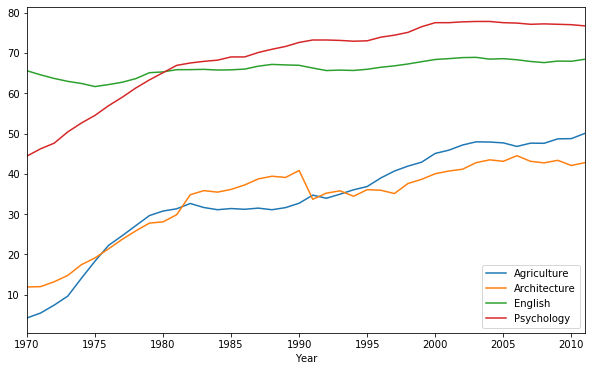

In [8]:
plot_fields = ['Agriculture','Architecture','English','Psychology']
women_majors.plot(x='Year',y=plot_fields, figsize=[10,6])

#### Semicolon to suppress text output

[ipython docs on ; to suppress output](https://ipython.org/ipython-doc/3/interactive/tips.html#suppress-output)

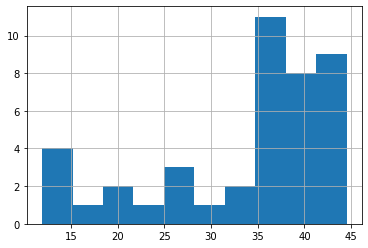

In [9]:
women_majors['Architecture'].hist();

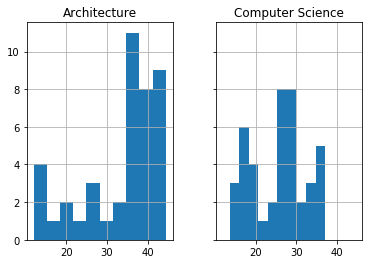

In [10]:
women_majors[['Architecture','Computer Science']].hist(sharex=True, sharey=True);

### Only plot lines for majors that have min(percent) < 20 at some time

In [11]:
women_majors.min() < 20

Year                             False
Agriculture                       True
Architecture                      True
Art and Performance              False
Biology                          False
Business                          True
Communications and Journalism    False
Computer Science                  True
Education                        False
Engineering                       True
English                          False
Foreign Languages                False
Health Professions               False
Math and Statistics              False
Physical Sciences                 True
Psychology                       False
Public Administration            False
Social Sciences and History      False
dtype: bool

In [12]:
low_majors = women_majors.columns[women_majors.min() < 20]
low_majors

Index(['Agriculture', 'Architecture', 'Business', 'Computer Science',
       'Engineering', 'Physical Sciences'],
      dtype='object')

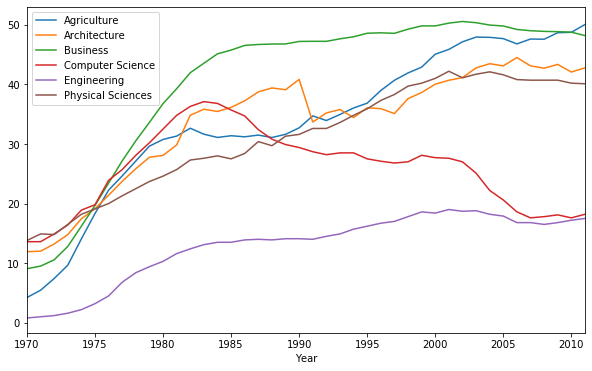

In [13]:
women_majors.plot(x='Year', y=low_majors, figsize=[10,6]);

In [14]:
import altair as alt

In [15]:
women_tidy = women_majors.melt(id_vars=['Year'], var_name='field', value_name='percent')
women_tidy.head()

,Year,field,percent
0,1970,Agriculture,4.229798
1,1971,Agriculture,5.452797
2,1972,Agriculture,7.420710
3,1973,Agriculture,9.653602
4,1974,Agriculture,14.074623


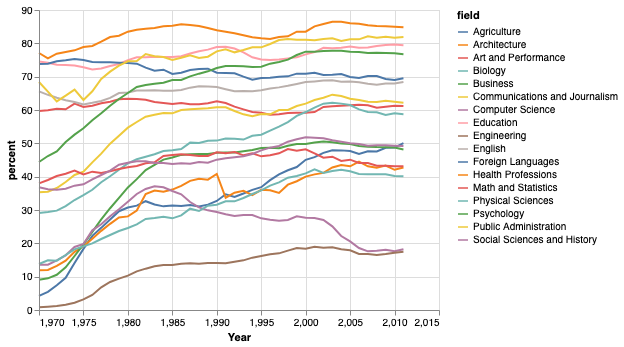

In [16]:
alt.Chart(women_tidy).mark_line().encode(
    x = 'Year',
    y = 'percent',
    color = 'field',
    tooltip = 'field'
)

In [17]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

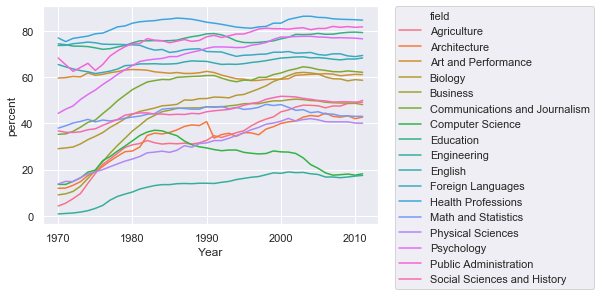

In [18]:
sns.lineplot(data=women_tidy, x='Year', y='percent', hue='field')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Group_by

In [19]:
# Note that this gives separate min for each column!
low_pt = women_tidy.groupby('field').min()
low_pt.sort_values(by='percent')

,Year,percent
field,,
Engineering,1970,0.800000
Agriculture,1970,4.229798
Business,1970,9.064439
Architecture,1970,11.921005
Computer Science,1970,13.600000
Physical Sciences,1970,13.800000
Biology,1970,29.088363
Communications and Journalism,1970,35.300000
Social Sciences and History,1970,36.100000


In [20]:
low_pt.reset_index(inplace=True)
low_pt.head()

,field,Year,percent
0,Agriculture,1970,4.229798
1,Architecture,1970,11.921005
2,Art and Performance,1970,58.600000
3,Biology,1970,29.088363
4,Business,1970,9.064439


In [21]:
low_pt[low_pt['percent']<20]

,field,Year,percent
0,Agriculture,1970,4.229798
1,Architecture,1970,11.921005
4,Business,1970,9.064439
6,Computer Science,1970,13.600000
8,Engineering,1970,0.800000
13,Physical Sciences,1970,13.800000


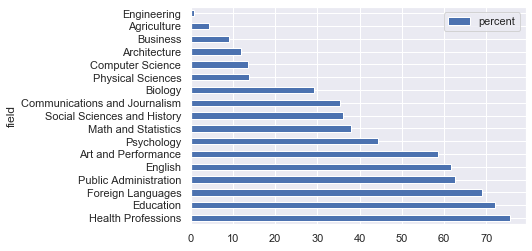

In [22]:
low_pt.sort_values(by='percent', ascending=False).plot.barh(y='percent', x='field')

### Use groupby and idxmin() to get rows with min percent in each field

[last answer in this stack overflow thread](https://stackoverflow.com/questions/19647343/how-to-use-argmin-with-groupby-in-pandas)

In [23]:
indx = women_tidy.groupby('field')['percent'].idxmin()
women_min_rows = women_tidy.loc[indx]
women_min_rows.sort_values('percent')

,Year,field,percent
336,1970,Engineering,0.800000
0,1970,Agriculture,4.229798
168,1970,Business,9.064439
42,1970,Architecture,11.921005
252,1970,Computer Science,13.600000
546,1970,Physical Sciences,13.800000
126,1970,Biology,29.088363
210,1970,Communications and Journalism,35.300000
674,1972,Social Sciences and History,36.100000
504,1970,Math and Statistics,38.000000


### Aggregate data and color by test

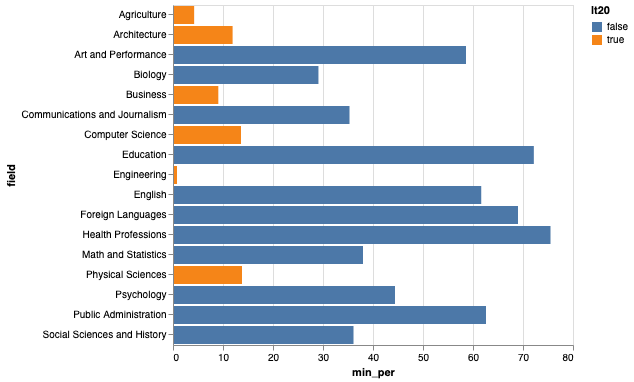

In [24]:
alt.Chart(women_tidy).mark_bar().encode(
    x = 'min_per:Q',
    y = 'field:N',
    color = 'lt20:N'
).transform_aggregate(
    min_per = 'min(percent)',
    groupby=['field']
).transform_calculate(
    lt20 = 'datum.min_per < 20'
)

### Color by test, but don't completely aggregate data (sorted results)

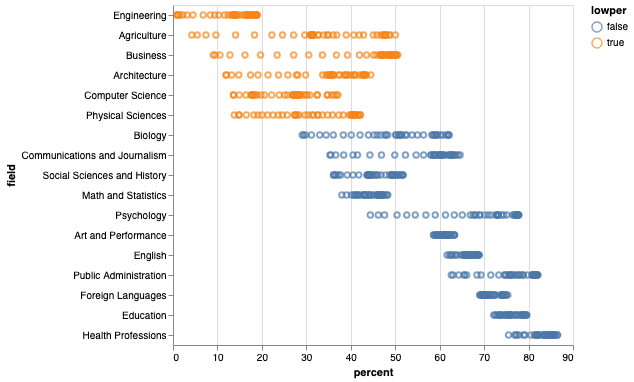

In [25]:
alt.Chart(women_tidy).mark_point().transform_joinaggregate(
    minper = 'min(percent)', 
    groupby=['field']
).transform_calculate(
    lowper = 'datum.minper < 20'
).encode(
    x = 'percent:Q',
    y = alt.Y('field:N', sort=alt.Sort(field="percent", op="min", order="ascending")),
    color = 'lowper:N'
)

#### Small multiples with Altair

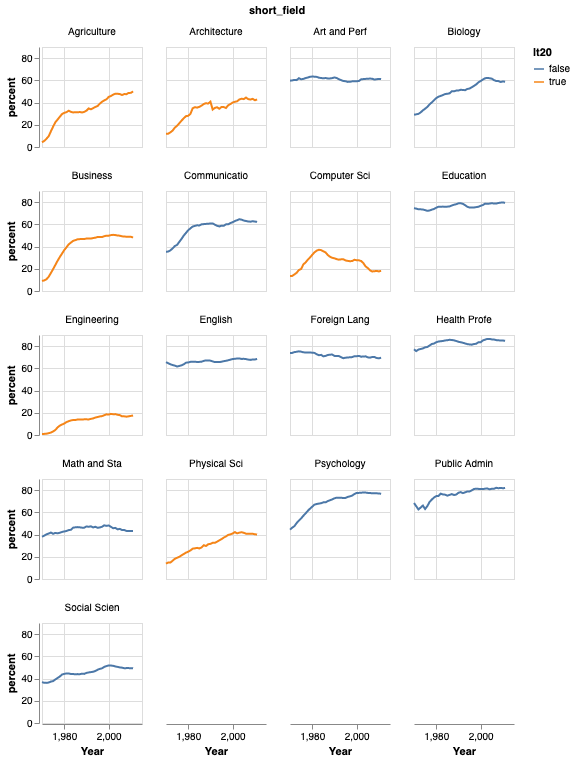

In [26]:
women_tidy['lt20'] = women_tidy.groupby('field')['percent'].transform('min') < 20
women_tidy['short_field'] = women_tidy['field'].str[:12]

alt.Chart(women_tidy).mark_line().encode(
    x='Year:Q',
    y='percent:Q',
    color = 'lt20:N',
    facet='short_field:N'
).properties(
    columns=4,
    width=100,
    height=100
)

#### Find for low-percentage 1970 fields with Pandas selector conditions

In [27]:
low70s = women_tidy[(women_tidy['Year']==1970) & (women_tidy['percent']<20)]
low70s

,Year,field,percent,lt20,short_field
0,1970,Agriculture,4.229798,True,Agriculture
42,1970,Architecture,11.921005,True,Architecture
168,1970,Business,9.064439,True,Business
252,1970,Computer Science,13.600000,True,Computer Sci
336,1970,Engineering,0.800000,True,Engineering
546,1970,Physical Sciences,13.800000,True,Physical Sci


#### Filter data before feeding it to Altair to plot

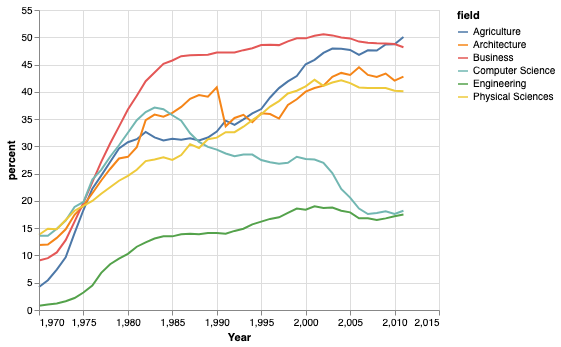

In [28]:
women_low_start = women_tidy[women_tidy['field'].isin(low70s['field'])]

alt.Chart(women_low_start).mark_line().encode(
    x = 'Year',
    y = 'percent',
    color = 'field'
)

#### Pandas histogram function can split by like groupby

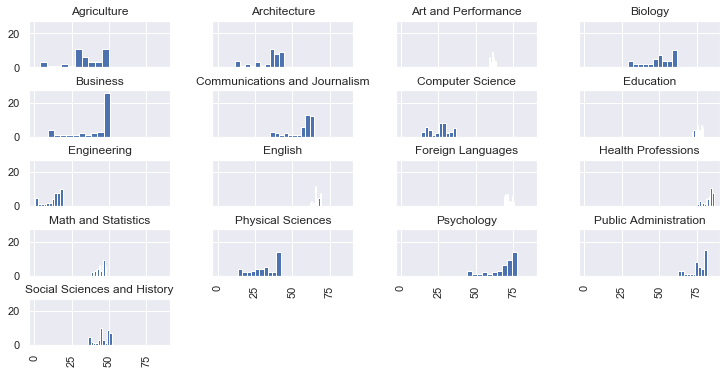

In [29]:
women_tidy.hist(by='field', column='percent', sharex=True, sharey=True, figsize=[12,6]);

### Renaming columns

### Testing for a subset

### Vectorized operations

Contrast to iterating through all rows

### Creating a new column

## Indexing and selecting data

[Indexing and selecting data in Pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

The axis labeling information in pandas objects serves many purposes:

- Identifies data (i.e. provides metadata) using known indicators
- Enables automatic and explicit data alignment
- Allows intuitive getting and setting of subsets of the data set

### Choices for indexing

**`.loc`** is primarily **label** based, but may also be used with a boolean array. 
`.loc` will raise KeyError when the items are not found. 

Most common allowed inputs are:

- A single label, e.g. 5 or 'a' (Note that 5 is interpreted as a label of the index. *This use is not an integer position along the index.*).
- A list or array of labels ['a', 'b', 'c'].
- A slice object with labels 'a':'f' (*Note that contrary to usual python slices, both the start and the stop are included, when present in the index! See Slicing with labels and Endpoints are inclusive.*)
- A boolean array

**`.iloc`** is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. 

**I try to avoid integer position based indexing of my dataframes in Pandas!**

In [30]:
women_year = women_majors.set_index('Year')
women_year.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [31]:
women_year.describe()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


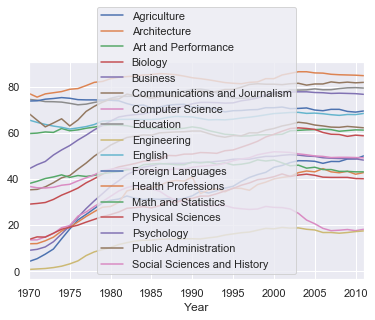

In [32]:
women_year.plot(y=women_year.columns)

In [33]:
women_year.loc[1970]

Agriculture                       4.229798
Architecture                     11.921005
Art and Performance              59.700000
Biology                          29.088363
Business                          9.064439
Communications and Journalism    35.300000
Computer Science                 13.600000
Education                        74.535328
Engineering                       0.800000
English                          65.570923
Foreign Languages                73.800000
Health Professions               77.100000
Math and Statistics              38.000000
Physical Sciences                13.800000
Psychology                       44.400000
Public Administration            68.400000
Social Sciences and History      36.800000
Name: 1970, dtype: float64

In [34]:
women_year.loc[1970,'Architecture']

11.92100539

### df['column_name'] is a shortcut for `df.loc[:,'column_name']

In [35]:
women_year['Architecture'].head()

Year
1970    11.921005
1971    12.003106
1972    13.214594
1973    14.791613
1974    17.444688
Name: Architecture, dtype: float64

In [36]:
women_year.loc[:,'Architecture'].head()

Year
1970    11.921005
1971    12.003106
1972    13.214594
1973    14.791613
1974    17.444688
Name: Architecture, dtype: float64

### Never use plain integer ranges in brackets!

It works, but you'll just confuse yourself.

In [37]:
women_year[0:3]

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


### If you need to access by integer, use `iloc[]` instead

In [38]:
women_year.iloc[0:3]

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


In [39]:
women_year.iloc[0:3,0:3]

,Agriculture,Architecture,Art and Performance
Year,,,
1970,4.229798,11.921005,59.7
1971,5.452797,12.003106,59.9
1972,7.420710,13.214594,60.4


## Super confusing! Don't use integer access, if possible

**Remember that `.loc[]` indexing is inclusive, unlike regular Python integer slices**

**Also, columns are ordered!**

In [40]:
women_year.loc[1970:1972,'Agriculture':'Art and Performance']

,Agriculture,Architecture,Art and Performance
Year,,,
1970,4.229798,11.921005,59.7
1971,5.452797,12.003106,59.9
1972,7.420710,13.214594,60.4


### `df.loc[]` range selections depend on ordering!

To show this, let's sort the values according to a column instead of the default ordering, which is the data order, which was sorted by years.

In [41]:
women_ag_sort = women_year.sort_values(by='Public Administration')
women_ag_sort.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,23.9,72.166525,4.5,62.148194,74.4,79.2,41.5,20.0,56.9,65.6,39.2


Now if we do label-based selection, a range of years doesn't give us anything back!

*Actually, this would be a good example of a time when you'd want to use integer-based selection with `iloc[]`...*

In [42]:
women_ag_sort.loc[1970:1975,'Public Administration']

Series([], Name: Public Administration, dtype: float64)

In [43]:
women_ag_sort.loc[1972:1976,'Public Administration']

Year
1972    62.6
1975    63.0
1973    64.3
1971    65.5
1976    65.6
Name: Public Administration, dtype: float64

## `df.groupby()`

Note that **no splitting occurs until it’s needed**. Creating the GroupBy object only verifies that you’ve passed a valid mapping.

By default the group keys are sorted during the groupby operation. You may however pass sort=False for potential speedups.

Note that groupby will preserve the order in which observations are sorted within each group. For example, the groups created by groupby() below are in the order they appeared in the original DataFrame.

In [44]:
women_tidy.groupby('field')

In [45]:
cs_idxs = women_tidy.groupby('field').groups['Computer Science']
women_tidy.iloc[cs_idxs].head()

,Year,field,percent,lt20,short_field
252,1970,Computer Science,13.6,True,Computer Sci
253,1971,Computer Science,13.6,True,Computer Sci
254,1972,Computer Science,14.9,True,Computer Sci
255,1973,Computer Science,16.4,True,Computer Sci
256,1974,Computer Science,18.9,True,Computer Sci


In [46]:
women_tidy.groupby('field').agg({'percent':'min'})

,percent
field,
Agriculture,4.229798
Architecture,11.921005
Art and Performance,58.600000
Biology,29.088363
Business,9.064439
Communications and Journalism,35.300000
Computer Science,13.600000
Education,72.166525
Engineering,0.800000


## `sort_values()`

## Indexing

For me, this is one of the most confusing things about Pandas: the fact that there are multiple ways to access slices and elements of a DataFrame, and that the most common method is in some ways the most confusing.